In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
# Common information about the data set and attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<BarContainer object of 31 artists>

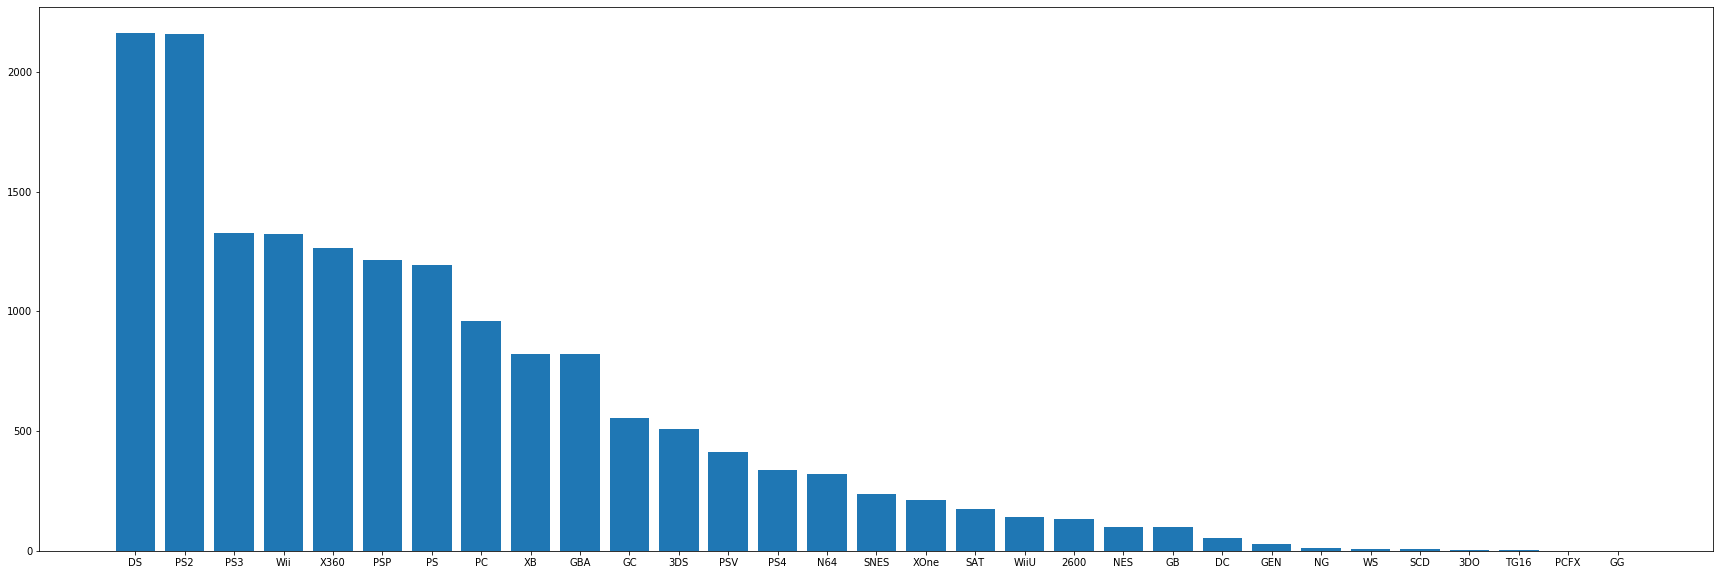

In [4]:
#platform which has highest games
plt.figure(figsize=(30,10))
plt.bar(data['Platform'].value_counts().index,data['Platform'].value_counts())

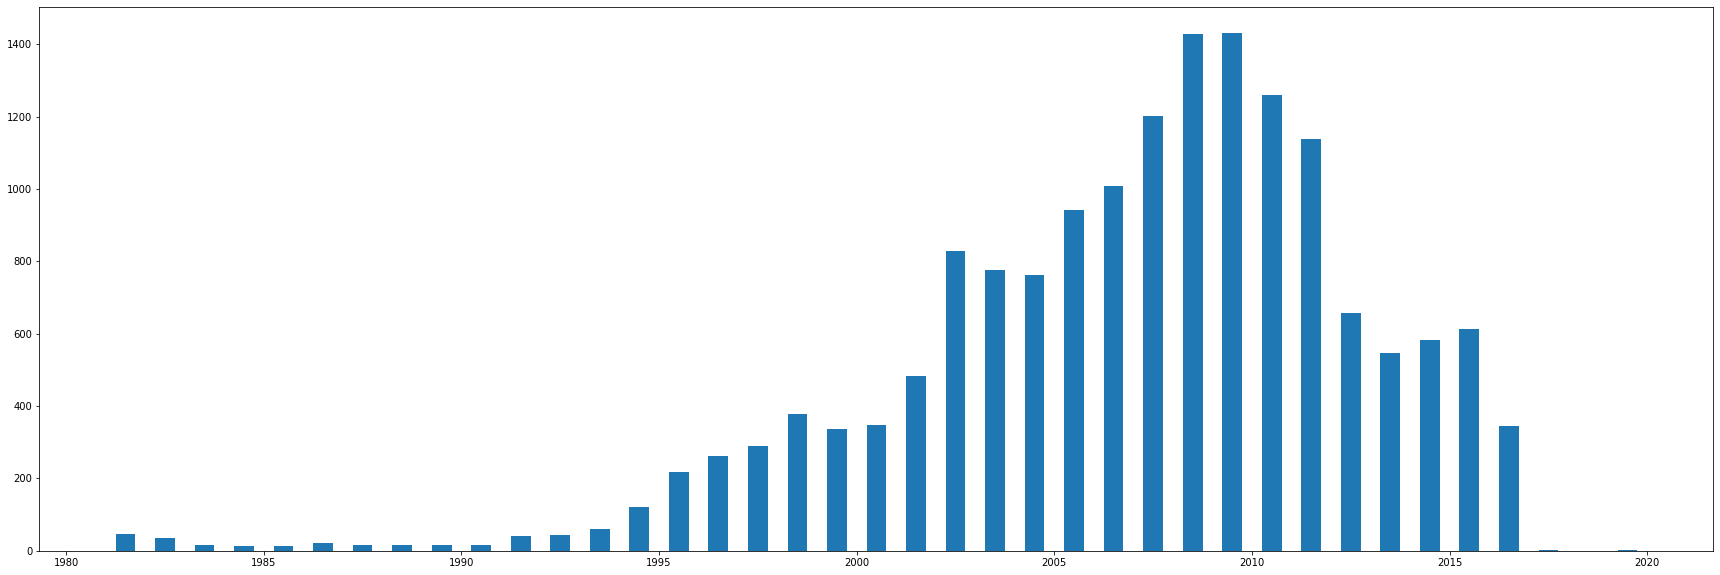

In [5]:
#no. of Games release in a year
plt.figure(figsize=(30,10))
plt.hist(data['Year'],bins=[a for a in range(1981,2021)],rwidth=0.5)
plt.show()

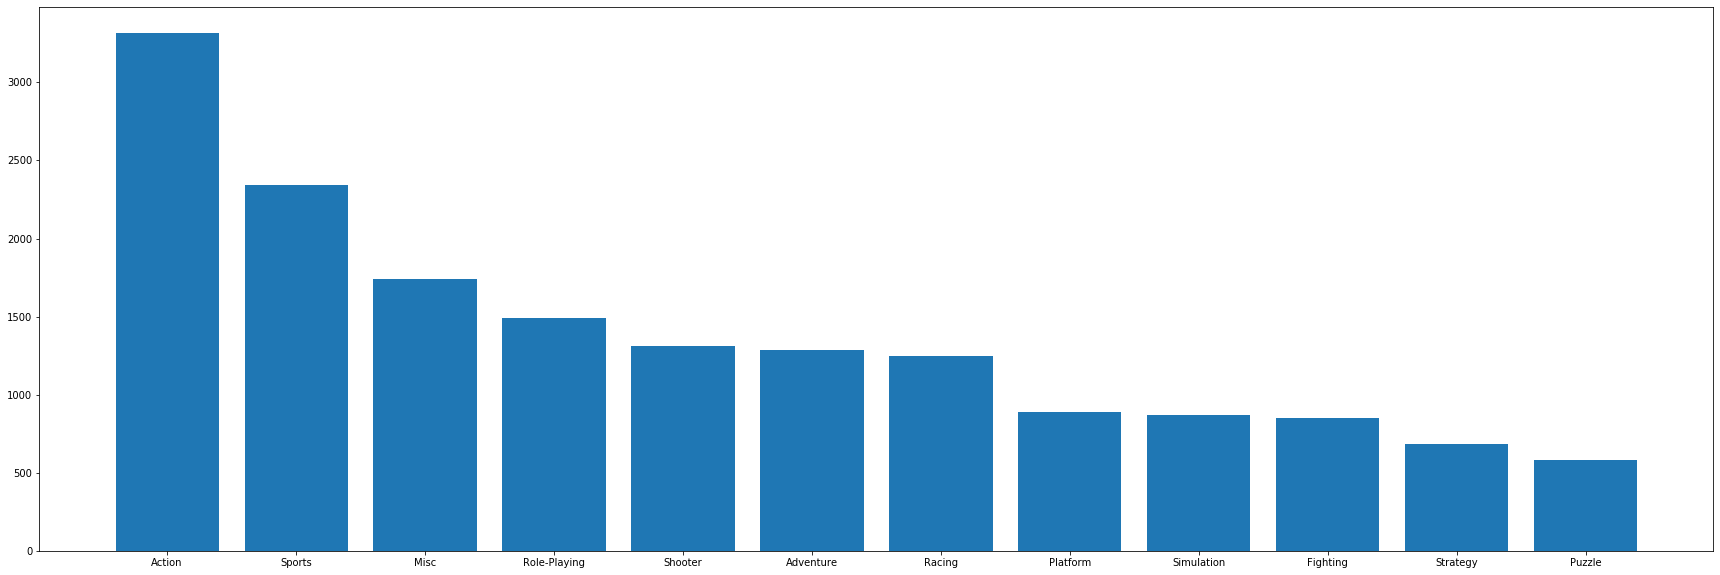

In [6]:
#Which Genre has the highest no. of games
plt.figure(figsize=(30,10))
plt.bar(data['Genre'].value_counts().index,data['Genre'].value_counts())
plt.show() 

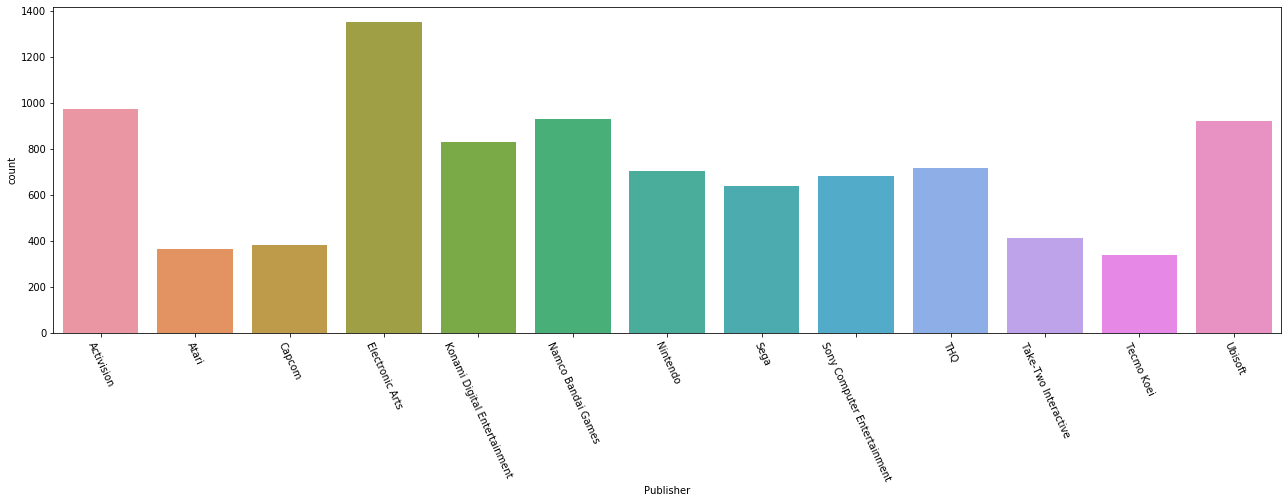

In [7]:
#Game Publishers vs their games count
df_Publisher=pd.DataFrame(data.groupby("Publisher").Rank.count())
df_Publisher = df_Publisher.rename(columns={"Rank": "count"})
df_Publisher = df_Publisher.loc[df_Publisher["count"] > 300]

ingredients = list(df_Publisher.index)
plt.figure(figsize=(22,6))
a = sns.barplot(x=df_Publisher.index, y=df_Publisher["count"])
a.set_xticklabels(labels=df_Publisher.index, rotation=-65) 
plt.show()

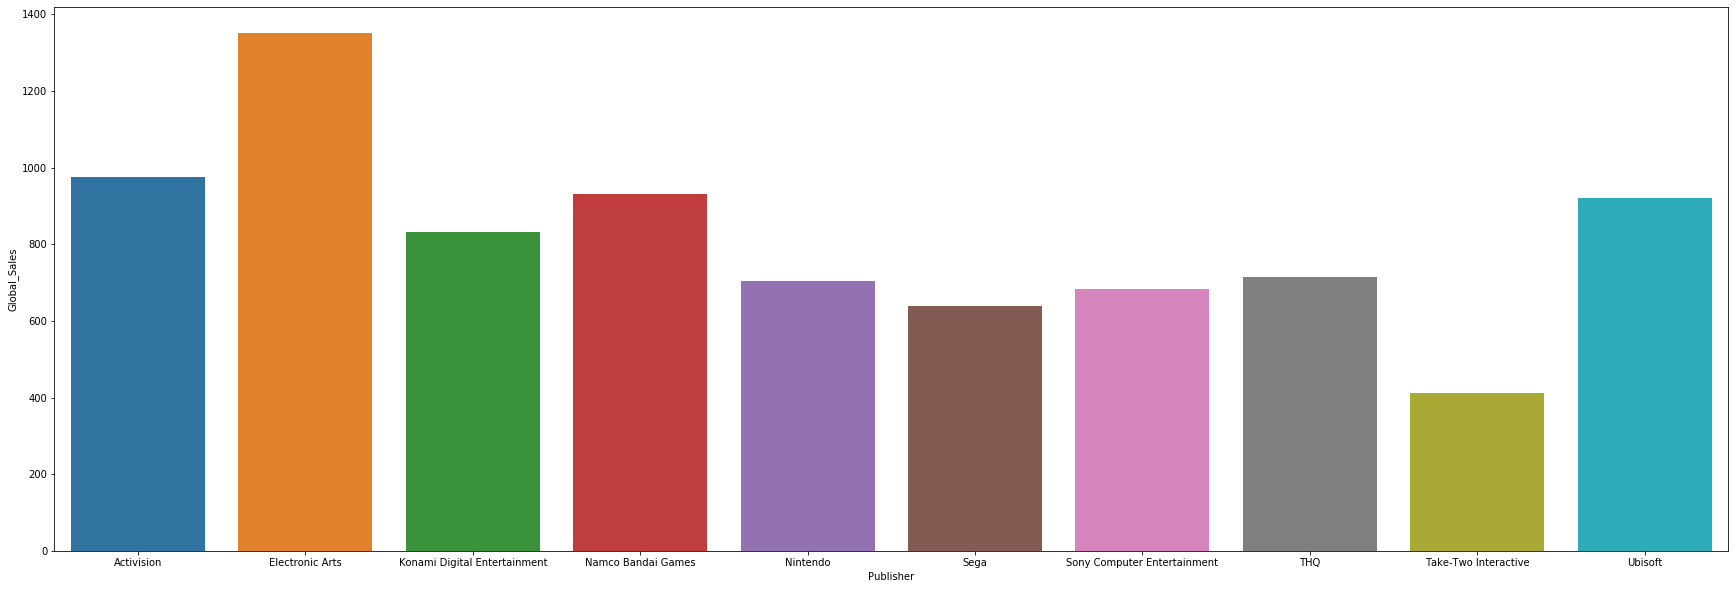

In [8]:
dff = data.groupby(['Publisher'], as_index=False)['Global_Sales'].count()
dff=dff[dff['Global_Sales']>400]
plt.figure(figsize=(30,10))

sns.barplot(x='Publisher',data=dff,y='Global_Sales')

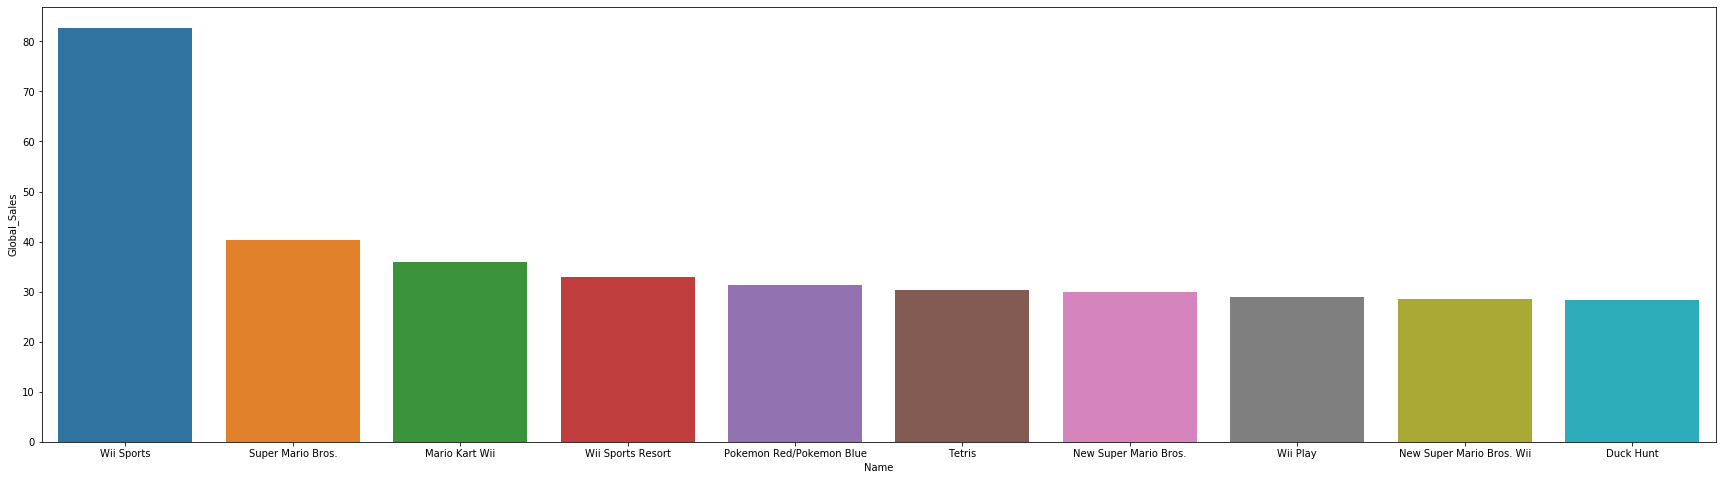

In [9]:
#Highest Global_Sales game
df=data[['Name','Global_Sales']].sort_values('Global_Sales',ascending=False)[:10]
plt.figure(figsize=(30,8))
sns.barplot(data=df,x='Name',y='Global_Sales')

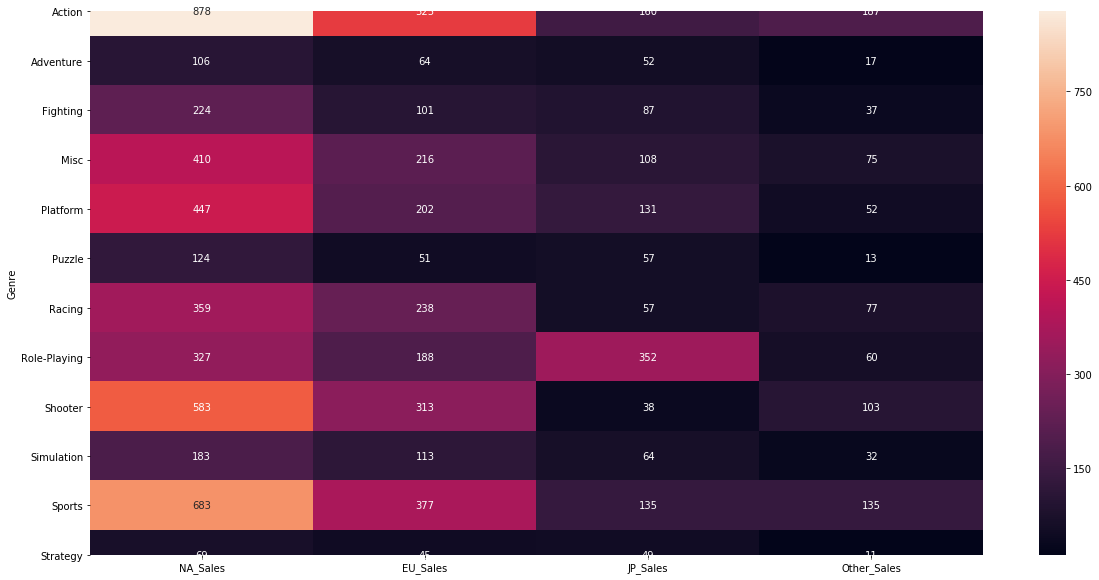

In [10]:
#Genre vs sales heatmap
sales=data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales = sales.groupby('Genre').sum()
plt.figure(figsize=(20,10))
sns.heatmap(sales,annot=True,fmt= '.0f')

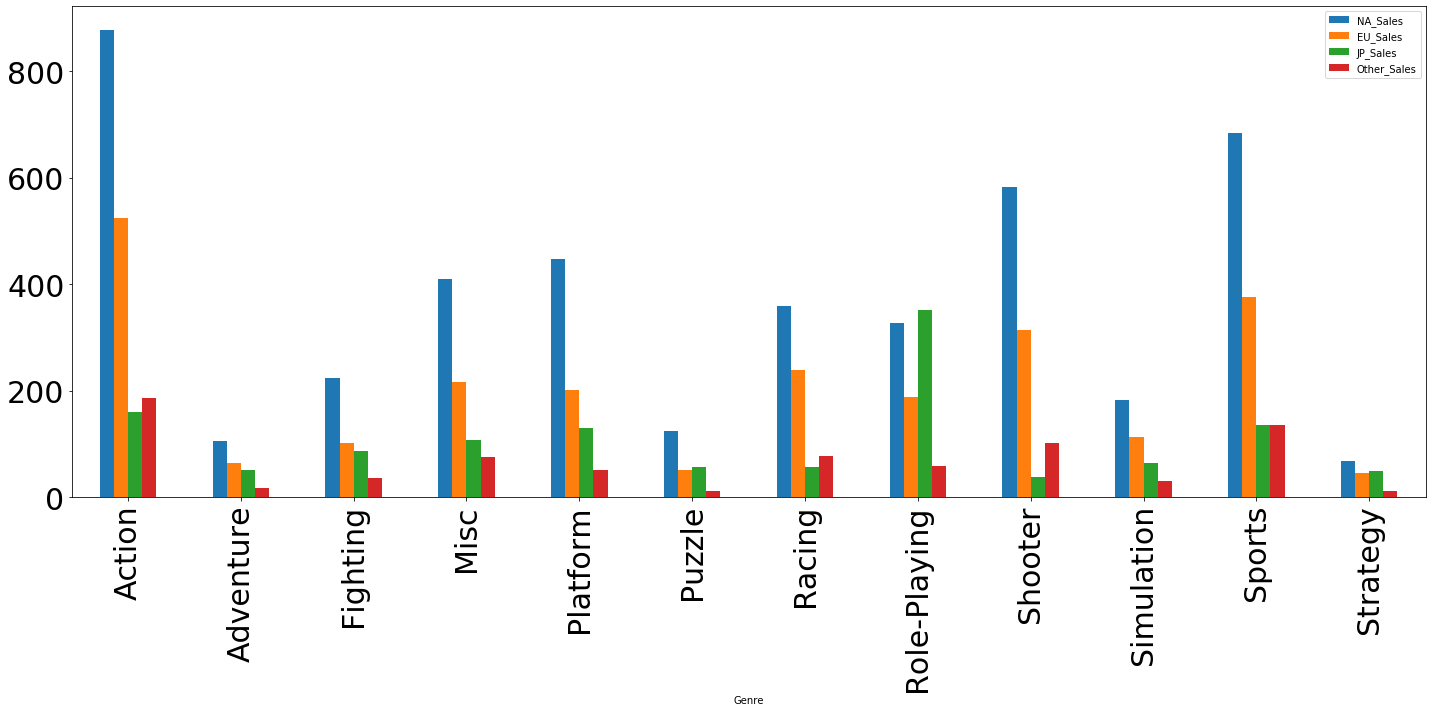

In [11]:
#Genre vs sales plot
sales.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()

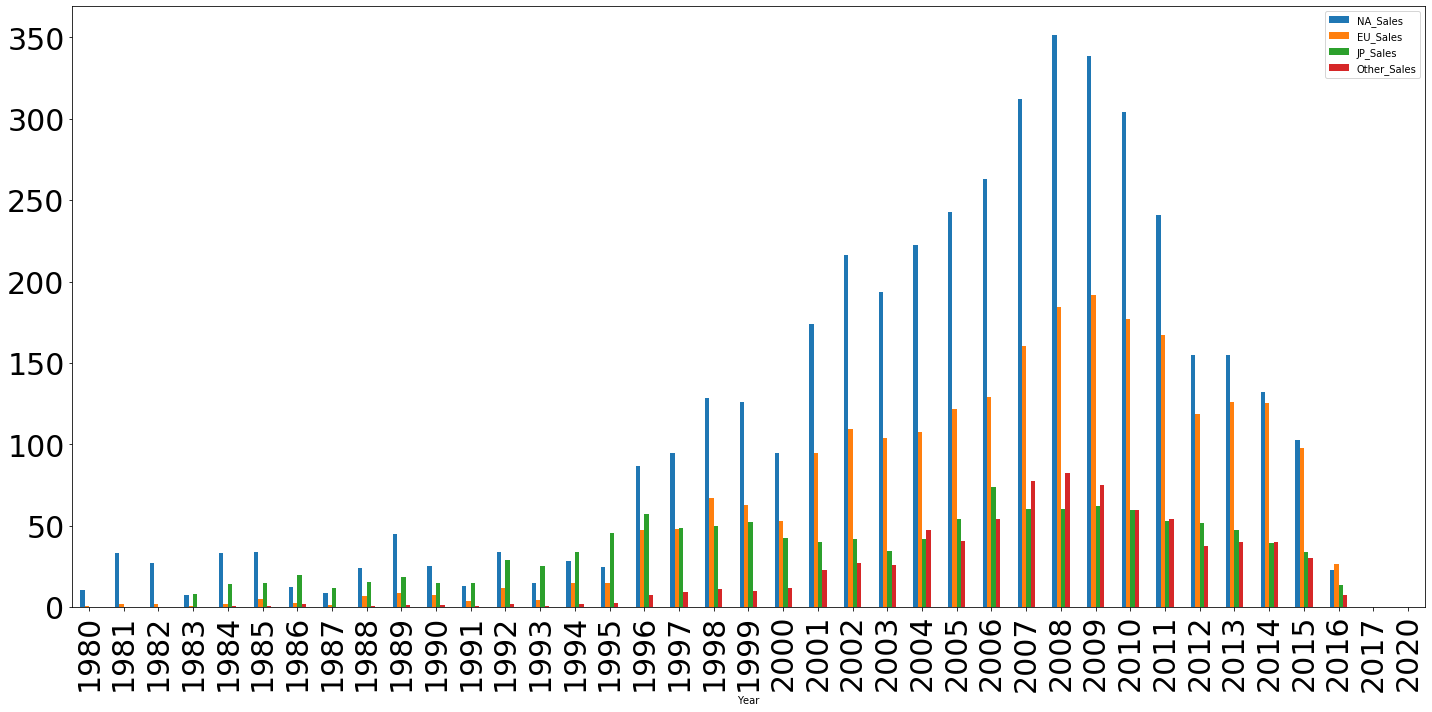

In [12]:
#Year vs sales plot
sales1=data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby('Year').sum()
sales1.index=sales1.index.astype(int)
sales1.plot.bar(figsize=(20,10),fontsize=30)
plt.tight_layout()
plt.show()

In [13]:
#  Checking & Remove Nan Values
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
# Filling missing value in year feature
data.Year = data.Year.fillna(data.Year.mean())

In [15]:
#one is numerical and other one is categorical so we use include='all' feature to show both features description
data[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16598.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.781197,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


In [16]:
# Change Year dtype to int32
data.Year = data.Year.astype('int32')
data.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

In [17]:
#Publisher is a categorical feature so we need to fill the missing values with values which is most repetitive.
data.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Navarre Corp                    0.000060
Tripwire Interactive            0.000060
Stainless Games                 0.000060
Summitsoft                      0.000060
Merscom LLC                     0.000060
Name: Publisher, Length: 578, dtype: float64

In [18]:
# To replace value we can use mode to get 'Electronic Arts'.
data.Publisher = data.Publisher.fillna(data.Publisher.mode()[0])

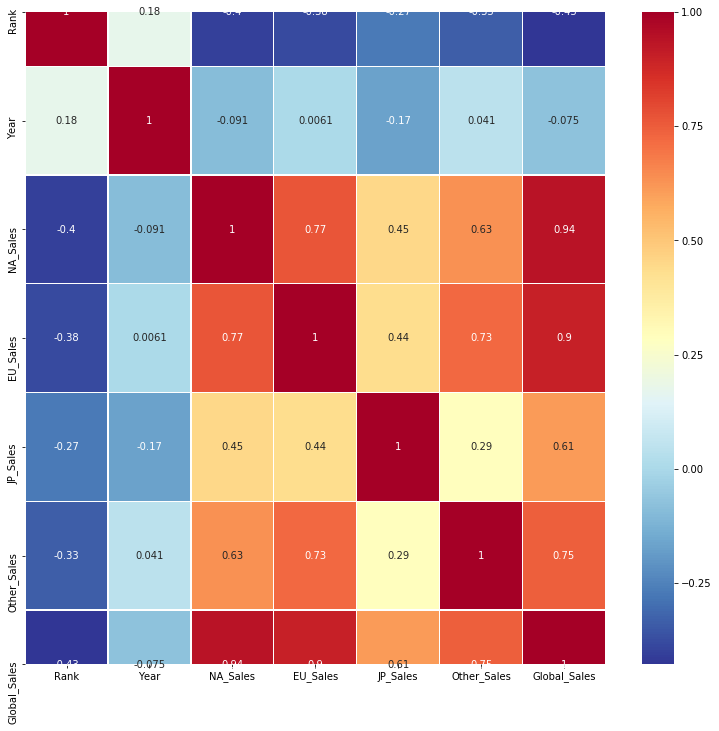

In [19]:
#Displaying the correlation for the numerical feature.
corr_ = data.corr()
plt.figure(figsize=(13,12))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.show()

In [20]:
# Duplicated rows check
data.duplicated().any()

False

In [21]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [22]:
#Removing Outliers
price_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

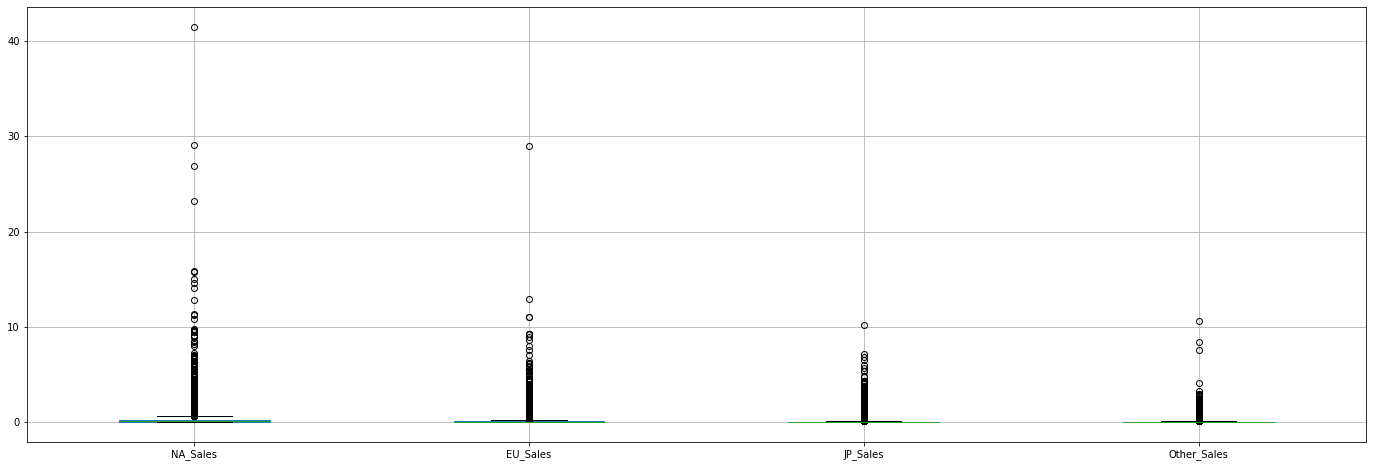

In [23]:
data[price_cols].boxplot(figsize=(24, 8))

In [24]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 2
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [25]:
print(f"dataset size before removing outliers= {data.shape[0]}")
for col in price_cols:
    data = std_based(col, data)
print(f"dataset size after removing outliers= {data.shape[0]}")

dataset size before removing outliers= 16598
dataset size after removing outliers= 14841


Feature Labeling

In [26]:
#one hot encoding
labeled_df = pd.get_dummies(
    data,
    columns=["Platform", "Genre", 'Publisher'], 
    prefix=["platform", "genre", 'pub']
)
labeled_df

,Rank,Name,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,platform_2600,platform_3DO,...,pub_Zoo Games,pub_Zushi Games,pub_bitComposer Games,pub_dramatic create,pub_fonfun,pub_iWin,pub_id Software,pub_imageepoch Inc.,pub_inXile Entertainment,pub_responDESIGN
551,552,The Legend of Zelda: A Link to the Past,2002,1.75,0.52,0.33,0.10,2.70,0,0,...,0,0,0,0,0,0,0,0,0,0
588,589,Streets of Rage,1990,1.86,0.55,0.11,0.08,2.60,0,0,...,0,0,0,0,0,0,0,0,0,0
601,602,Sonic Adventure 2 Battle,2001,1.70,0.59,0.21,0.07,2.56,0,0,...,0,0,0,0,0,0,0,0,0,0
617,618,Rockstar Games Double Pack: Grand Theft Auto I...,2003,1.84,0.56,0.00,0.09,2.49,0,0,...,0,0,0,0,0,0,0,0,0,0
619,620,Mortal Kombat: Deadly Alliance,2002,1.81,0.52,0.00,0.15,2.49,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,2002,0.01,0.00,0.00,0.00,0.01,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,16597,Men in Black II: Alien Escape,2003,0.01,0.00,0.00,0.00,0.01,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,16598,SCORE International Baja 1000: The Official Game,2008,0.00,0.00,0.00,0.00,0.01,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,16599,Know How 2,2010,0.00,0.01,0.00,0.00,0.01,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
labeled_df.dtypes

Rank                          int64
Name                         object
Year                          int32
NA_Sales                    float64
EU_Sales                    float64
                             ...   
pub_iWin                      uint8
pub_id Software               uint8
pub_imageepoch Inc.           uint8
pub_inXile Entertainment      uint8
pub_responDESIGN              uint8
Length: 623, dtype: object

In [28]:
bins = pd.qcut(labeled_df['NA_Sales'],7, duplicates='drop')
bins.value_counts(sort=False)

(-0.001, 0.04]    6364
(0.04, 0.09]      2346
(0.09, 0.16]      2081
(0.16, 0.31]      1992
(0.31, 1.86]      2058
Name: NA_Sales, dtype: int64

In [29]:
bins = pd.qcut(labeled_df['EU_Sales'],7, duplicates='drop')
bins.value_counts(sort=False)

(-0.001, 0.01]    6954
(0.01, 0.03]      2166
(0.03, 0.06]      1650
(0.06, 0.15]      2036
(0.15, 0.62]      2035
Name: EU_Sales, dtype: int64

In [30]:
bins = pd.qcut(labeled_df['JP_Sales'],7, duplicates='drop')
bins.value_counts(sort=False)

(-0.001, 0.02]    11205
(0.02, 0.07]       1558
(0.07, 0.45]       2078
Name: JP_Sales, dtype: int64

In [31]:
bins = pd.qcut(labeled_df['Other_Sales'],7, duplicates='drop')
bins.value_counts(sort=False)

(-0.001, 0.01]    9696
(0.01, 0.02]      1536
(0.02, 0.04]      1529
(0.04, 0.15]      2080
Name: Other_Sales, dtype: int64

In [32]:
def sales_category(value):
    if value > 0.31:
        return 5
    elif value > 0.16:
        return 4
    elif value > 0.09:
        return 3
    elif value > 0.04:
        return 2
    else :
        return 1

In [33]:
labeled_df[price_cols] = labeled_df[price_cols].applymap(sales_category)

In [34]:
#Sampling the data : The data is very large and will take hours to evaluate, so we will take a 20% sample and evaluate the results.
labeled_df = labeled_df.sample(frac=0.3, random_state=1)

In [35]:
#Splitting Data
from sklearn.model_selection import train_test_split

In [36]:
y_na = labeled_df['NA_Sales']
y_eu = labeled_df['EU_Sales']
y_jp = labeled_df['JP_Sales']
y_other = labeled_df['Other_Sales']
x = labeled_df.drop(columns=[*price_cols, 'Global_Sales', 'Name'])

In [37]:
x_train_na, x_test_na, y_train_na, y_test_na = train_test_split(x, y_na, test_size=0.2, random_state=1)
x_train_eu, x_test_eu, y_train_eu, y_test_eu = train_test_split(x, y_eu, test_size=0.2, random_state=1)
x_train_jp, x_test_jp, y_train_jp, y_test_jp = train_test_split(x, y_jp, test_size=0.2, random_state=1)
x_train_other, x_test_other, y_train_other, y_test_other = train_test_split(x, y_other, test_size=0.2, random_state=1)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Cross Validation for SVM
clf = SVC()

scores_na = cross_val_score(clf, x, y_na, cv=10)
print("CV scores of NA = {}".format(scores_na))
print("mean CV score of NA= {}".format(scores_na.mean()))

scores_eu = cross_val_score(clf, x, y_eu, cv=10)
print("CV scores of EU = {}".format(scores_eu))
print("mean CV score of EU = {}".format(scores_eu.mean()))

scores_jp = cross_val_score(clf, x, y_jp, cv=10)
print("CV scores of JP = {}".format(scores_jp))
print("mean CV score of JP = {}".format(scores_jp.mean()))

scores_other = cross_val_score(clf, x, y_other, cv=10)
print("CV scores of Other = {}".format(scores_other))
print("mean CV score of Other = {}".format(scores_other.mean()))

#Grid Search for SVM

params = {'C': [0.1, 1.0, 10.0],'kernel': ['linear', 'rbf',]}
svc_grid_na = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
svc_grid_eu = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
svc_grid_jp = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
svc_grid_other = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)


svc_grid_na.fit(x_train_na, y_train_na)
print(svc_grid_na.score(x_test_na, y_test_na))
print(svc_grid_na.best_params_)

svc_grid_eu.fit(x_train_eu, y_train_eu)
print(svc_grid_eu.score(x_test_eu, y_test_eu))
print(svc_grid_eu.best_params_)

svc_grid_jp.fit(x_train_jp, y_train_jp)
print(svc_grid_jp.score(x_test_jp, y_test_jp))
print(svc_grid_jp.best_params_)

svc_grid_other.fit(x_train_other, y_train_other)
print(svc_grid_other.score(x_test_other, y_test_other))
print(svc_grid_other.best_params_)

Cross Validation for Logistic Regression

In [39]:
clf = LogisticRegression()

scores_na = cross_val_score(clf, x, y_na, cv=10)
print("CV scores of NA = {}".format(scores_na))
print("mean CV score of NA= {}".format(scores_na.mean()))

scores_eu = cross_val_score(clf, x, y_eu, cv=10)
print("CV scores of EU = {}".format(scores_eu))
print("mean CV score of EU = {}".format(scores_eu.mean()))

scores_jp = cross_val_score(clf, x, y_jp, cv=10)
print("CV scores of JP = {}".format(scores_jp))
print("mean CV score of JP = {}".format(scores_jp.mean()))

scores_other = cross_val_score(clf, x, y_other, cv=10)
print("CV scores of Other = {}".format(scores_other))
print("mean CV score of Other = {}".format(scores_other.mean()))

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

CV scores of NA = [0.59731544 0.57941834 0.59060403 0.5941704  0.59192825 0.6
 0.57882883 0.58333333 0.59819413 0.59142212]
mean CV score of NA= 0.5905214877298617


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_c

CV scores of EU = [0.70982143 0.70469799 0.70693512 0.71300448 0.70561798 0.6981982
 0.6981982  0.70720721 0.71846847 0.72234763]
mean CV score of EU = 0.7084496701893049


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_c

CV scores of JP = [0.80133929 0.80133929 0.80089485 0.80089485 0.80449438 0.80630631
 0.80630631 0.80812641 0.80812641 0.80812641]
mean CV score of JP = 0.804595450774156


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver 

CV scores of Other = [0.89038031 0.88814318 0.87472036 0.88116592 0.88089888 0.90540541
 0.87387387 0.89414414 0.88063063 0.88738739]
mean CV score of Other = 0.8856750085003167


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
#Grid Search for Logistic Regression

params = {'C': [0.1, 1.0, 10.0]}
lr_grid_na = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
lr_grid_eu = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
lr_grid_jp = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
lr_grid_other = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)

In [41]:
lr_grid_na.fit(x_train_na, y_train_na)
print(lr_grid_na.score(x_test_na, y_test_na))
print(lr_grid_na.best_params_)

0.5735129068462402
{'C': 0.1}


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [42]:
lr_grid_eu.fit(x_train_eu, y_train_eu)
print(lr_grid_eu.score(x_test_eu, y_test_eu))
print(lr_grid_eu.best_params_)

0.7104377104377104
{'C': 0.1}


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [43]:
lr_grid_jp.fit(x_train_jp, y_train_jp)
print(lr_grid_jp.score(x_test_jp, y_test_jp))
print(lr_grid_jp.best_params_)

0.8069584736251403
{'C': 0.1}


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
lr_grid_other.fit(x_train_other, y_train_other)
print(lr_grid_other.score(x_test_other, y_test_other))
print(lr_grid_other.best_params_)

0.8855218855218855
{'C': 0.1}


C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Cross Validation Search for KNN

In [45]:
clf = KNeighborsClassifier()

scores_na = cross_val_score(clf, x, y_na, cv=10)
print("CV scores of NA = {}".format(scores_na))
print("mean CV score of NA= {}".format(scores_na.mean()))

scores_eu = cross_val_score(clf, x, y_eu, cv=10)
print("CV scores of EU = {}".format(scores_eu))
print("mean CV score of EU = {}".format(scores_eu.mean()))

scores_jp = cross_val_score(clf, x, y_jp, cv=10)
print("CV scores of JP = {}".format(scores_jp))
print("mean CV score of JP = {}".format(scores_jp.mean()))

scores_other = cross_val_score(clf, x, y_other, cv=10)
print("CV scores of Other = {}".format(scores_other))
print("mean CV score of Other = {}".format(scores_other.mean()))

CV scores of NA = [0.60178971 0.57494407 0.62639821 0.54932735 0.61659193 0.59101124
 0.59459459 0.60810811 0.58465011 0.56659142]
mean CV score of NA= 0.5914006747209137
CV scores of EU = [0.70982143 0.68008949 0.67114094 0.69058296 0.6494382  0.68243243
 0.68918919 0.67792793 0.68018018 0.68397291]
mean CV score of EU = 0.6814775657209415
CV scores of JP = [0.79464286 0.78794643 0.7852349  0.76733781 0.79101124 0.77252252
 0.79954955 0.79458239 0.79006772 0.7765237 ]
mean CV score of JP = 0.7859419115574957
CV scores of Other = [0.88590604 0.8836689  0.89709172 0.8632287  0.87191011 0.87612613
 0.87612613 0.8963964  0.87162162 0.88513514]
mean CV score of Other = 0.8807210883983192


In [46]:
#Grid Search for KNN

params = {'n_neighbors': [5, 10, 20, 30, 50],'metric': ['minkowski',], 'p': [2]}
knn_grid_na = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
knn_grid_eu = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
knn_grid_jp = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)
knn_grid_other = GridSearchCV(clf, param_grid = params, scoring='accuracy', n_jobs=-1, cv=10)

In [47]:
knn_grid_na.fit(x_train_na, y_train_na)
print(knn_grid_na.score(x_test_na, y_test_na))
print(knn_grid_na.best_params_)

0.6430976430976431
{'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}


In [48]:
knn_grid_eu.fit(x_train_eu, y_train_eu)
print(knn_grid_eu.score(x_test_eu, y_test_eu))
print(knn_grid_eu.best_params_)

0.7138047138047138
{'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}


In [49]:
knn_grid_jp.fit(x_train_jp, y_train_jp)
print(knn_grid_jp.score(x_test_jp, y_test_jp))
print(knn_grid_jp.best_params_)

0.8069584736251403
{'metric': 'minkowski', 'n_neighbors': 30, 'p': 2}


In [50]:
knn_grid_other.fit(x_train_other, y_train_other)
print(knn_grid_other.score(x_test_other, y_test_other))
print(knn_grid_other.best_params_)

0.8787878787878788
{'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}


In [51]:
from tabulate import tabulate

mydata = [["NA", "KNN","{'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}","64%"], 
          ["EU", "LR","{'C': 0.1}","71%"], 
          ["JP", "LR","{'C': 0.1}","81%"], 
          ["Other", "KNN","{'metric': 'minkowski', 'n_neighbors':50, 'p': 2}","88%"]]

head = ["Region","Method","Params","Accuracy"]

print(tabulate(mydata, headers=head, tablefmt="fancy_grid"))

╒══════════╤══════════╤════════════════════════════════════════════════════╤════════════╕
│ Region   │ Method   │ Params                                             │ Accuracy   │
╞══════════╪══════════╪════════════════════════════════════════════════════╪════════════╡
│ NA       │ KNN      │ {'metric': 'minkowski', 'n_neighbors': 50, 'p': 2} │ 64%        │
├──────────┼──────────┼────────────────────────────────────────────────────┼────────────┤
│ EU       │ LR       │ {'C': 0.1}                                         │ 71%        │
├──────────┼──────────┼────────────────────────────────────────────────────┼────────────┤
│ JP       │ LR       │ {'C': 0.1}                                         │ 81%        │
├──────────┼──────────┼────────────────────────────────────────────────────┼────────────┤
│ Other    │ KNN      │ {'metric': 'minkowski', 'n_neighbors':50, 'p': 2}  │ 88%        │
╘══════════╧══════════╧════════════════════════════════════════════════════╧════════════╛
